This exercise is based on a walkthrough in Packt's advanced machine learning course available at udemy.com

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# Load data
cancer_data = load_breast_cancer()

In [3]:
# Test/Train split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, 
    cancer_data.target,
    stratify = cancer_data.target,
    shuffle = True,
    random_state = 314
)

In [4]:
# Fit model and check accuracy 
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.96


In [5]:
# Make predictions, create confusion matrix, and observe results
pred_lr = lr.predict(X_test)
confusion = confusion_matrix(y_test, pred_lr)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_lr, target_names = ["malignant", "benign"]))

Confusion matrix:
[[50  3]
 [ 3 87]]
             precision    recall  f1-score   support

  malignant       0.94      0.94      0.94        53
     benign       0.97      0.97      0.97        90

avg / total       0.96      0.96      0.96       143



In [6]:
# Repeat process with scaled data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_scaled = lr.fit(X_train_scaled, y_train)
print("Train set accuracy: {:.2f}".format(lr_scaled.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.2f}".format(lr_scaled.score(X_test_scaled, y_test)))


Train set accuracy: 0.99
Test set accuracy: 0.98


In [ ]:
pred_lr_scaled = lr_scaled.predict(X_test_scaled)
confusion = confusion_matrix(y_test, pred_logreg_scaled)
print("Confusion matrix:\n{}".format(confusion))

In [7]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test_scaled))

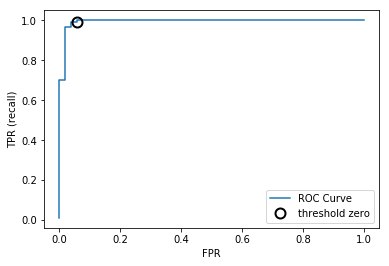

In [11]:
# Plot ROC curve
plt.plot(fpr, tpr, label = "ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
nearest_to_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[nearest_to_zero], tpr[nearest_to_zero], 'o', markersize = 10,
label = "threshold zero", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)